링크 : https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs

In [2]:
#링크가져와서 요청 후 서버에게 응답받기
res = req.get("https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C")
res

<Response [200]>

In [3]:
#html형식으로 파싱
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="겨울 코디 추천 : 네이버 블로그검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." property="og:description"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." lang="ko" name="description"/> <title>겨울 코디 추천 : 네이버 블로그검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet

In [4]:

link_elements = soup.select("a.sds-comps-text-link")

# 가장 유력한 후보 선택자를 사용해 제목 요소를 추출합니다.
title_elements = soup.select("span.sds-comps-text-type-headline1")

if title_elements:
    # 제목 텍스트 추출 성공
    first_title_text = title_elements[0].text.strip()
    print(f"✅ 제목 추출 성공: {first_title_text}")

    # 추가 디버깅: 해당 제목이 몇 개나 추출되었는지 확인
    print(f"총 추출된 제목 요소 개수: {len(title_elements)}개")

else:
    print("❌ 경고: 해당 선택자로 제목을 찾지 못했습니다. 다른 선택자를 시도해야 합니다.")

✅ 제목 추출 성공: UGG 1910 호주 여자 어그부츠 추천 국내정식런칭 프리미엄 겨울코디
총 추출된 제목 요소 개수: 30개


In [5]:
# 'sds-comps-vertical-layout'과 'sds-comps-full-layout'을 모두 가진 요소를 선택합니다.
container_selector = ".sds-comps-vertical-layout.sds-comps-full-layout"

# 예시 코드
blog_items = soup.select(container_selector)

if blog_items:
    print(f"✅ 추출된 블로그 항목 컨테이너 개수: {len(blog_items)}개")

    # 이 컨테이너 내에서 링크를 찾습니다.
    first_item = blog_items[0]

    # 컨테이너 내부에서 블로그 링크 (a 태그)를 필터링
    blog_links_in_item = []
    for link_tag in first_item.find_all('a'):
        href = link_tag.get('href', '')
        if "blog.naver.com" in href:
            blog_links_in_item.append(href)

    if blog_links_in_item:
        print(f"첫 번째 항목 내에서 찾은 링크: {blog_links_in_item[0]}")
    else:
        print("경고: 컨테이너는 찾았으나, 그 안에서 블로그 링크를 찾지 못했습니다.")

✅ 추출된 블로그 항목 컨테이너 개수: 164개
첫 번째 항목 내에서 찾은 링크: https://blog.naver.com/minju1004b/224109903723


In [6]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

query = "겨울코디추천"
url = (
    f"https://search.naver.com/search.naver"
    f"?ssc=tab.blog.all&query={query}&sm=tab_opt"
    f"&nso=so:dd,p:1w&start=1"
)

blog_links = []
res = requests.get(url, headers=headers)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, "lxml")

    link_selectors = ["a.total_tit", "a.title_link", "div.blog_item a"]
    link_elements = []

    for selector in link_selectors:
        link_elements = soup.select(selector)
        if link_elements:
            print(f"✅ 성공: 선택자 '{selector}'로 링크 요소 {len(link_elements)}개 찾음.")
            break

    # 2. 찾은 요소에서 href 속성을 추출합니다.
    if link_elements:
        for element in link_elements:
            href = element.get('href', '')
            if href and "blog.naver.com" in href:
                 # 불필요한 링크 제외 (필요 시 더 추가)
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # 3. 모든 선택자 실패 시 (최후의 수단): 모든 <a> 태그를 필터링합니다.
    if not blog_links:
        print("❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.")

        for a in soup.find_all('a'):
            href = a.get('href', '')
            if "blog.naver.com" in href:
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # ----------------------------------------------------

    # 중복 제거
    blog_links = list(dict.fromkeys(blog_links))


print("\n" + "="*40)
print(f"✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: {len(blog_links)}개")
print("="*40)

if blog_links:
    print("\n[전체 블로그 링크 목록]")
    for i, link in enumerate(blog_links, 1):
        print(f"{i}. {link}")

❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.

✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: 56개

[전체 블로그 링크 목록]
1. https://blog.naver.com/zbzvioc12r
2. https://blog.naver.com/zbzvioc12r/224144399473
3. https://blog.naver.com/godls2513
4. https://blog.naver.com/godls2513/224139459202
5. https://blog.naver.com/inquire_7326495
6. https://blog.naver.com/inquire_7326495/224144396434
7. https://blog.naver.com/minahyoung2
8. https://blog.naver.com/minahyoung2/224144396413
9. https://blog.naver.com/joswmxllpc893
10. https://blog.naver.com/joswmxllpc893/224144392245
11. https://blog.naver.com/some_2518
12. https://blog.naver.com/some_2518/224144391604
13. https://blog.naver.com/ogmfywi
14. https://blog.naver.com/ogmfywi/224144389724
15. https://blog.naver.com/lsosvbe7/224144388735
16. https://blog.naver.com/svqgmiasyq175
17. https://blog.naver.com/svqgmiasyq175/224144387346
18. https://blog.naver.com/pporriii
19. https://blog.naver.com/pporriii/224144387373
20. https://blog.naver.com/kzipz20e
21. https://blog.naver

In [7]:
# 현재 blog_links 변수에는 53개의 링크가 들어 있습니다.

cleaned_blog_links = []
for link in blog_links:
    # URL 경로의 마지막 세그먼트가 숫자로 된 포스트 번호인 경우만 남깁니다.
    # 포스트 번호는 10자리 이상의 숫자로 이루어져 있습니다.
    path_segments = link.split('/')
    last_segment = path_segments[-1]

    if last_segment.isdigit() and len(last_segment) >= 10:
        cleaned_blog_links.append(link)

# 만약 URL이 'm.blog.naver.com/...' 형태로 바로 포스트 주소인 경우도 포함합니다.
# 이 필터링은 완벽하지 않을 수 있지만, 불필요한 메인 주소를 줄여줍니다.

print(f"✅ 분석 대상 포스트 링크 수 (클리닝 후): {len(cleaned_blog_links)}개")

✅ 분석 대상 포스트 링크 수 (클리닝 후): 30개


In [8]:
print("\n[클리닝 후 블로그 포스트 링크 30개]")

for i, link in enumerate(cleaned_blog_links[:30], 1):
    print(f"{i}. {link}")



[클리닝 후 블로그 포스트 링크 30개]
1. https://blog.naver.com/zbzvioc12r/224144399473
2. https://blog.naver.com/godls2513/224139459202
3. https://blog.naver.com/inquire_7326495/224144396434
4. https://blog.naver.com/minahyoung2/224144396413
5. https://blog.naver.com/joswmxllpc893/224144392245
6. https://blog.naver.com/some_2518/224144391604
7. https://blog.naver.com/ogmfywi/224144389724
8. https://blog.naver.com/lsosvbe7/224144388735
9. https://blog.naver.com/svqgmiasyq175/224144387346
10. https://blog.naver.com/pporriii/224144387373
11. https://blog.naver.com/kzipz20e/224144385030
12. https://blog.naver.com/orjw5fx/224144384849
13. https://blog.naver.com/dalcome5/224144382339
14. https://blog.naver.com/iuzntnjboh353/224144379616
15. https://blog.naver.com/nizjylct/224144379121
16. https://blog.naver.com/ghtjd1647/224143980387
17. https://blog.naver.com/bachelorsaju/224132013974
18. https://blog.naver.com/tbcatshj/224144376940
19. https://blog.naver.com/vzzr1121/224144372181
20. https://blog.naver

In [9]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import re

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}


In [10]:
ITEMS = [
    "코트", "패딩", "자켓", "점퍼", "블레이저", "가디건", "니트", "스웨터",
    "셔츠", "블라우스", "티셔츠", "후드티", "바지", "청바지", "슬랙스",
    "스커트", "치마", "원피스", "부츠", "로퍼", "운동화", "스니커즈",
    "가방", "백팩", "머플러", "목도리", "장갑", "모자", "비니",
    "조거팬츠", "바라클라바", "스웻셔츠", "레깅스", "후리스", "롱부츠", "숄더백"
]

COLORS = [
    "블랙", "화이트", "아이보리", "베이지", "그레이", "네이비", "브라운",
    "카키", "버건디", "레드", "핑크", "블루", "스카이블루",
    "옐로우", "오렌지", "민트", "퍼플",
    "크림", "오트밀", "라떼", "딥그린", "와인", "카멜", "톤온톤"
]

MATERIALS = [
    "울", "캐시미어", "가죽", "코튼", "면", "데님", "린넨", "실크",
    "나일론", "폴리에스터", "스웨이드", "니트", "퍼", "벨벳",
    "아크릴", "레이온", "스판덱스", "코듀로이", "플리스",
    "다운", "웰론", "양털", "무스탕"
]


In [11]:
STOPWORDS = [
    "하다", "되다", "있다", "없다", "이다", "같다",
    "그리고", "그래서", "하지만", "또한", "또", "및",
    "정말", "너무", "진짜", "완전", "약간",
    "오늘", "이번", "요즘", "최근",
    "것", "수", "때", "점", "분",
    "사용", "느낌", "추천", "소개", "후기",
    "가능", "제품", "아이템", "스타일",
    "같이", "보다", "하면서", "때문에", "위해", "대한"
]

def clean_text(text):
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    words = [
        w for w in text.split()
        if w not in STOPWORDS and len(w) > 1
    ]
    return " ".join(words)


In [12]:
def extract_keywords(text, keyword_list):
    counter = Counter()
    text = text.lower()
    for keyword in keyword_list:
        counter[keyword] += text.count(keyword.lower())
    return counter


In [13]:
contents = []

for link in blog_links:
    if "blog.naver.com" in link:
        link = link.replace("blog.naver.com", "m.blog.naver.com")

    res = requests.get(link, headers=headers)
    if res.status_code != 200:
        continue

    soup = BeautifulSoup(res.text, "lxml")

    body = soup.select_one(".se-main-container") or soup.select_one("div.post_ct")
    if not body:
        continue

    text = body.get_text("\n", strip=True)
    if len(text) < 100:
        continue

    contents.append(clean_text(text))
    time.sleep(0.5)

print("분석 대상 본문 수:", len(contents))


분석 대상 본문 수: 30


In [14]:
item_counter = Counter()
color_counter = Counter()
material_counter = Counter()

for text in contents:
    item_counter.update(extract_keywords(text, ITEMS))
    color_counter.update(extract_keywords(text, COLORS))
    material_counter.update(extract_keywords(text, MATERIALS))

print("\n👕 아이템 TOP 5")
print(item_counter.most_common(5))

print("\n🎨 컬러 TOP 5")
print(color_counter.most_common(5))

print("\n🧶 소재 TOP 5")
print(material_counter.most_common(5))



👕 아이템 TOP 5
[('니트', 62), ('패딩', 61), ('부츠', 60), ('바지', 59), ('모자', 43)]

🎨 컬러 TOP 5
[('블랙', 41), ('화이트', 14), ('브라운', 13), ('그레이', 12), ('블루', 12)]

🧶 소재 TOP 5
[('울', 249), ('면', 207), ('니트', 62), ('퍼', 61), ('양털', 26)]


/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-158337205.py:65: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipytho

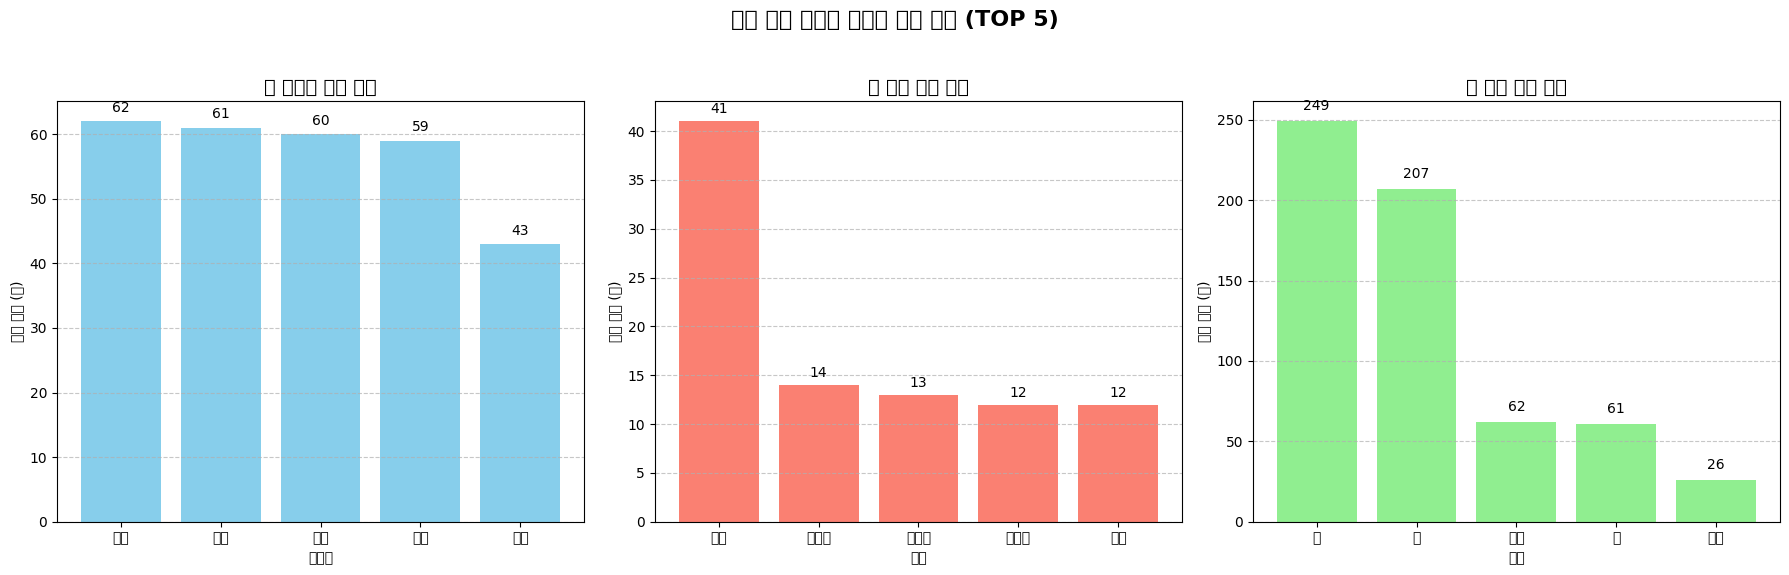

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 1. 시각화 데이터 준비
item_data = item_counter.most_common(5)
color_data = color_counter.most_common(5)
material_data = material_counter.most_common(5)

df_items = pd.DataFrame(item_data, columns=['아이템', '횟수'])
df_colors = pd.DataFrame(color_data, columns=['컬러', '횟수'])
df_materials = pd.DataFrame(material_data, columns=['소재', '횟수'])

# ----------------------------------------------------
# 2. 그래프 설정 및 그리기
# ----------------------------------------------------

# 한글 폰트 설정 (Windows 환경을 기준으로 Malgun Gothic 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 만약 여전히 이모지(\N{T-SHIRT})나 한글이 깨진다면, 사용자 환경에 맞는 폰트로 변경하세요.
# 예: Colab/Linux 환경: plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3개의 서브플롯(sub-plots) 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('겨울 코디 블로그 콘텐츠 분석 결과 (TOP 5)', fontsize=16, fontweight='bold')

# --- 첫 번째 그래프: 아이템 ---
ax1 = axes[0]
bars1 = ax1.bar(df_items['아이템'], df_items['횟수'], color='skyblue')
ax1.set_title('👕 아이템 언급 횟수', fontsize=14)
ax1.set_xlabel('아이템')
ax1.set_ylabel('언급 횟수 (회)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # 수정 완료

# --- 두 번째 그래프: 컬러 ---
ax2 = axes[1]
bars2 = ax2.bar(df_colors['컬러'], df_colors['횟수'], color='salmon')
ax2.set_title('🎨 컬러 언급 횟수', fontsize=14)
ax2.set_xlabel('컬러')
ax2.set_ylabel('언급 횟수 (회)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom') # 수정 완료

# --- 세 번째 그래프: 소재 ---
ax3 = axes[2]
bars3 = ax3.bar(df_materials['소재'], df_materials['횟수'], color='lightgreen')
ax3.set_title('🧶 소재 언급 횟수', fontsize=14)
ax3.set_xlabel('소재')
ax3.set_ylabel('언급 횟수 (회)')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars3:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom') # 수정 완료

# 그래프 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 713.3/713.3 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 15.5 MB/s et

In [17]:
import re

def clean_for_rag(text):
    # 1. HTML 태그 제거 (BeautifulSoup을 사용하지 않았다면 re.sub로 <.*?> 등을 제거)
    text = re.sub('<[^>]*>', '', text)
    # 2. 광고/협찬 문구 제거 (예시)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    # 3. URL 제거
    text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)
    # 4. 특수 문자 및 이모지 제거 (한글, 영문, 숫자, 마침표, 쉼표 외 제거)
    text = re.sub(r'[^\w\s.,가-힣]', '', text)
    # 5. 과도한 공백 및 줄바꿈 정리
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 예시 적용
# cleaned_text = clean_for_rag(raw_text)

In [18]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4 langchain

In [19]:
# 텍스트 분할을 위한 전용 패키지 설치
!pip install langchain-text-splitters

# LangChain 코어 모듈 및 RAG에 필요한 모든 패키지 재설치 (안정성 확보)
!pip install langchain langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [20]:
!pip install langchain-text-splitters langchain langchain-core langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [21]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

def clean_for_rag(text):
    # RAG용 최소 정제 (이미 불용어 제거는 되어 있으니 가볍게)
    return text.strip()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", " ", ""]
)

langchain_documents = []

for idx, text in enumerate(contents):
    doc = Document(
        page_content=clean_for_rag(text),
        metadata={"source": f"blog_{idx}"}
    )
    langchain_documents.append(doc)

texts = text_splitter.split_documents(langchain_documents)

print(f"✅ 최종 분할된 청크 개수: {len(texts)}")


✅ 최종 분할된 청크 개수: 121


In [22]:
!pip install pandas

In [23]:
import pandas as pd

df_blogs = pd.DataFrame({
    "text": contents
})

print(df_blogs.head())


                                                text
0  따뜻하고 멋스러운 겨울 카고 팬츠의 매력 하단링크 눌러서 확인 있습니다 남자 기모 ...
1  포스팅은 네이버 쇼핑 커넥트 활동의 일환으로 판매 발생 수수료를 제공받습니다 안녕하...
2  똑똑한 선택 아페쎄하프집업 남성용 와플 하프집업 니트 트렌디함과 보온성 동시에 후기...
3  2025이 끝나기 이틀전이라 그런지 블로그에 친구들 글이 와다다 올라오는 중이네요 ...
4  비발디파크 렌탈샵 강원 홍천군 서면 한치골길 952 비발디파크 렌탈샵 비발디파크 렌...


In [24]:
def clean_for_rag(text):
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


In [25]:
# df_blogs 컬럼 확인 (안전 확인용)
print(df_blogs.columns)

# text 컬럼 클리닝 적용
df_blogs['text'] = df_blogs['text'].apply(clean_for_rag)

# 확인
print("--- 클리닝 후 DataFrame 상위 5개 행 ---")
print(df_blogs.head())


Index(['text'], dtype='object')
--- 클리닝 후 DataFrame 상위 5개 행 ---
                                                text
0  따뜻하고 멋스러운 겨울 카고 팬츠의 매력 하단링크 눌러서 확인 있습니다 남자 기모 ...
1  포스팅은 네이버 쇼핑 커넥트 활동의 일환으로 판매 발생 수수료를 제공받습니다 안녕하...
2  똑똑한 선택 아페쎄하프집업 남성용 와플 하프집업 니트 트렌디함과 보온성 동시에 후기...
3  2025이 끝나기 이틀전이라 그런지 블로그에 친구들 글이 와다다 올라오는 중이네요 ...
4  비발디파크 렌탈샵 강원 홍천군 서면 한치골길 952 비발디파크 렌탈샵 비발디파크 렌...


In [26]:
import pandas as pd

MIN_LENGTH = 50
MAX_LENGTH = 5000

print(f"필터링 전 데이터프레임 크기: {len(df_blogs)}")

# ----------------------------------------------------
# 1. 길이 기준 필터링
# ----------------------------------------------------
df_filtered = df_blogs[
    (df_blogs['text'].str.len() >= MIN_LENGTH) &
    (df_blogs['text'].str.len() <= MAX_LENGTH)
].copy()

# ----------------------------------------------------
# 2. 노이즈 패턴 기준 필터링
# ----------------------------------------------------
NOISE_PATTERNS = [
    r'로그인이\s*필요합니다',
    r'내소식\s*이웃목록\s*통계\s*클립만들기',
    r'공식블로그\s*NEW\s*이달의\s*블로그',
    r'앱알림\s*비활성화됨',
    r'오늘\s*\d+\s*전체\s*[\d,]+',
]

noise_mask = df_filtered['text'].str.contains(
    '|'.join(NOISE_PATTERNS),
    case=False,
    na=False
)

df_final = df_filtered[~noise_mask].reset_index(drop=True)

# ----------------------------------------------------
# 3. 최종 결과 확인
# ----------------------------------------------------
pd.set_option('display.max_colwidth', 500)

print(f"✅ 최종 정제 후 데이터프레임 크기: {len(df_final)}")
print("\n--- 최종 정제된 DataFrame 상위 5개 행 ---")
print(df_final[['text']].head())



필터링 전 데이터프레임 크기: 30
✅ 최종 정제 후 데이터프레임 크기: 28

--- 최종 정제된 DataFrame 상위 5개 행 ---
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text
0  따뜻하고 멋스러운 겨울 카고 팬츠의 매력 하단링크 눌러서 확인 있습니다 남자 기모 카고 골덴 와이드팬츠 겨울 코듀로이바지 마이클로드 마이클로드 나에게 주는 선물 마이클로드 naver me 겨울철이 다가오면서 편안하고 따뜻한 스타일을 찾는 것이 누구에게나 중요해지죠 최근에 만난 카고 골덴 와이드팬츠는 그런 점에서 특별한 아이템이에요 팬츠는 두툼한 기모가 들어가 있어 보온성이 뛰어나며 입었을 때의 느낌이 아주 부드럽고 아늑하답니다 새로운 스타일의 발견 기존의 청바지나 면바지에서 벗어나 새로운 스타일을 찾고 싶었던 저에게 카고 팬츠는 완벽한 선택이었어요 넉넉한 와이드핏 덕분에 레이어드 코디가 아주 쉬워집니다 상의를 어떤 스타일로 입어도 어울리니 매일매일 다른 조합을 시도해볼 있어요 포켓의 실용성 특히 팬츠의 카고 포켓이 마음에 들어요 개의 

In [27]:
# ⭐ 보강된 최종 리스트를 사용합니다 (세션에 정의되어 있어야 함)
# ITEMS, COLORS, MATERIALS 리스트를 사용

import pandas as pd
from collections import Counter
import re

# 최종 정제된 DataFrame 'df_final' 사용을 전제로 함
all_text = " ".join(df_final['text'].tolist()).lower()

# 모든 키워드를 하나로 통합
ALL_KEYWORDS = ITEMS + COLORS + MATERIALS

# 빈도수 계산 함수
def count_keywords(text, keyword_list):
    counter = Counter()
    for keyword in keyword_list:
        # 단어 경계를 사용하여 정확히 그 키워드만 카운트 (예: '니트'만, '니트원피스'가 아님)
        # 단, '롱부츠' 등 복합어는 그대로 검색
        pattern = r'\b' + re.escape(keyword.lower()) + r'\b'
        count = len(re.findall(pattern, text))

        # 정확도가 떨어지는 일부 복합 키워드는 더 넓게 검색 (예: 니트원피스, 울코트 등)
        if keyword.lower() in ["니트", "울", "가죽", "퍼"]:
             count += len(re.findall(re.escape(keyword.lower()), text)) / 3 # 가중치 낮춤

        if count > 0:
            counter[keyword] = count
    return counter

# 키워드별 언급 횟수 계산
item_counter = count_keywords(all_text, ITEMS)
color_counter = count_keywords(all_text, COLORS)
material_counter = count_keywords(all_text, MATERIALS)

# 상위 10개 키워드 출력
print("--- 🥇 재계산된 아이템 언급 횟수 (TOP 10) ---")
print(item_counter.most_common(10))

print("\n--- 🥈 재계산된 컬러 언급 횟수 (TOP 10) ---")
print(color_counter.most_common(10))

print("\n--- 🥉 재계산된 소재 언급 횟수 (TOP 10) ---")
print(material_counter.most_common(10))

--- 🥇 재계산된 아이템 언급 횟수 (TOP 10) ---
[('니트', 42.666666666666664), ('부츠', 30), ('머플러', 22), ('자켓', 17), ('모자', 14), ('바지', 10), ('코트', 9), ('패딩', 9), ('스웨터', 9), ('슬랙스', 6)]

--- 🥈 재계산된 컬러 언급 횟수 (TOP 10) ---
[('블랙', 19), ('브라운', 8), ('그레이', 4), ('블루', 4), ('화이트', 2), ('아이보리', 2), ('베이지', 2), ('레드', 1), ('옐로우', 1), ('톤온톤', 1)]

--- 🥉 재계산된 소재 언급 횟수 (TOP 10) ---
[('울', 72.0), ('니트', 42.666666666666664), ('스웨이드', 18), ('퍼', 18.0), ('양털', 13), ('무스탕', 13), ('다운', 12), ('코듀로이', 9), ('가죽', 8.333333333333334), ('데님', 2)]


In [28]:
import os
os.environ["GEMINI_API_KEY"] = #"API"

print("✅ 환경 변수 설정 완료. 이제 LLM 모델을 초기화할 수 있습니다.")

SyntaxError: invalid syntax (ipython-input-441950683.py, line 2)

In [ ]:
# ----------------------------------------------------
# Google Gemini LLM 설정
# ----------------------------------------------------

import os
from langchain_google_genai import GoogleGenerativeAI

# 환경변수에 API KEY가 이미 있다면 이 줄은 생략 가능
# os.environ["GOOGLE_API_KEY"] = "YOUR_API_KEY"

llm = GoogleGenerativeAI(
    model="gemini-1.5-flash",   # 빠르고 비용 적음 (분석용 추천)
    temperature=0.2             # 감성 분석은 낮게
)


In [ ]:
import os
from langchain_google_genai import GoogleGenerativeAI
import time

def analyze_sentiment_for_keyword_enhanced(df, keyword, llm_model):
    """
    주어진 키워드가 포함된 모든 문서를 찾아 감성을 분석합니다.
    (토큰 제한을 피하기 위해 최대 50,000자로 제한)
    """

    # 1. 키워드가 포함된 문서를 필터링
    keyword_docs = df[df['text'].str.contains(keyword, case=False, na=False)]

    if keyword_docs.empty:
        return f"🚨 '{keyword}' 키워드가 포함된 문서가 최종 DataFrame에서 발견되지 않았습니다."

    # 2. 키워드가 포함된 모든 문서의 텍스트를 결합하여 LLM에 전달
    full_texts = " ".join(keyword_docs['text'].tolist())
    text_to_process = full_texts[:50000]  # 최대 50,000자로 제한

    # 3. 감성 분석 프롬프트
    prompt = f"""
    아래 블로그 콘텐츠는 '{keyword}' 키워드를 포함하고 있습니다.
    이 텍스트에서 '{keyword}'를 언급하는 문장들을 중심으로 다음 두 가지를 분석하세요.

    1. **전반적인 감성:** 긍정적, 부정적, 또는 중립적 중 하나를 선택하세요.
    2. **긍/부정의 근거 (핵심 요약):** 그 감성을 뒷받침하는 구체적인 이유 2~3가지를 요약하세요.

    ---
    분석할 텍스트 (총 {len(keyword_docs)}개 문서의 내용): {text_to_process}
    ---
    """

    try:
        response = llm_model.invoke(prompt)
        return response.strip()
    except Exception as e:
        # LLM 토큰 제한이나 다른 API 오류 발생 시
        return f"❌ 감성 분석 중 오류 발생: {e}"


top_item = item_counter.most_common(1)[0][0]
top_color = color_counter.most_common(1)[0][0]
top_material = material_counter.most_common(1)[0][0]

# ----------------------------------------------------
# 3. 통합 분석 실행 및 결과 출력
# ----------------------------------------------------

# 분석할 키워드 리스트
keywords_to_analyze = [top_item, top_color, top_material]

# '울' 키워드에 대한 정확한 재분석을 위해 top_material이 '울'이 아니라면 추가
if top_material != '울':
    keywords_to_analyze.append('울')

for keyword in keywords_to_analyze:
    print(f"\n==========================================")
    print(f"✨ '{keyword}' 키워드 감성 분석 결과:")
    print("==========================================")

    start_time = time.time()

    # 향상된 함수 실행
    result = analyze_sentiment_for_keyword_enhanced(df_final, keyword, llm)

    end_time = time.time()

    print(f"[분석 소요 시간: {end_time - start_time:.2f}초]")
    print(result)

print("\n--- 분석 완료 ---")

In [ ]:
def crawl_blog_text(url: str) -> str:
    mobile_url = to_mobile_blog(url)

    try:
        res = requests.get(mobile_url, headers=headers, timeout=10)
    except requests.RequestException:
        return ""

    if res.status_code != 200:
        return ""

    soup = BeautifulSoup(res.text, "lxml")

    content = soup.select_one("div.se-main-container")
    if not content:
        return ""

    return content.get_text(separator="\n", strip=True)


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin



In [ ]:
def crawl_pc_blog_text(pc_url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    # 1️⃣ PC 블로그 페이지 요청
    res = requests.get(pc_url, headers=headers, timeout=10)
    if res.status_code != 200:
        print("❌ PC 페이지 요청 실패")
        return None

    soup = BeautifulSoup(res.text, "lxml")

    # 2️⃣ iframe 찾기
    iframe = soup.find("iframe", id="mainFrame")
    if not iframe:
        print("❌ iframe 없음")
        return None

    iframe_src = iframe.get("src")
    if not iframe_src:
        print("❌ iframe src 없음")
        return None

    # 3️⃣ iframe src → 절대 URL
    iframe_url = urljoin(pc_url, iframe_src)

    # 4️⃣ iframe 내부 재요청
    iframe_res = requests.get(iframe_url, headers=headers, timeout=10)
    if iframe_res.status_code != 200:
        print("❌ iframe 페이지 요청 실패")
        return None

    iframe_soup = BeautifulSoup(iframe_res.text, "lxml")

    # 5️⃣ 본문 추출 (스마트에디터)
    content = iframe_soup.select_one("div.se-main-container")
    if not content:
        print("❌ 본문 컨테이너 없음")
        return None

    text = content.get_text(separator="\n").strip()
    return text


In [ ]:
url = "https://blog.naver.com/coolps8/224110633229"

text = crawl_pc_blog_text(url)

if text:
    print("✅ 본문 수집 성공")
    print("글자 수:", len(text))
    print("\n--- 본문 미리보기 ---")
    print(text[:500])
else:
    print("❌ 본문 수집 실패")


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"\* 본 포스팅은.*?작성되었습니다\.", "", text)
    text = re.sub(r"\n{2,}", "\n", text)
    return text.strip()


In [ ]:
if len(text) < 500:
    print("❌ 본문 너무 짧아 제외")


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
from urllib.parse import urljoin

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# --------------------------------------------------
# 1️⃣ PC → 모바일 URL 변환
# --------------------------------------------------
def to_mobile_blog(url):
    if "m.blog.naver.com" in url:
        return url

    match = re.search(r'blog.naver.com/([^/]+)/(\d+)', url)
    if match:
        blog_id, post_no = match.groups()
        return f"https://m.blog.naver.com/{blog_id}/{post_no}"

    return None


# --------------------------------------------------
# 2️⃣ 모바일 블로그 본문 크롤링
# --------------------------------------------------
def crawl_mobile_blog(url):
    mobile_url = to_mobile_blog(url)
    if not mobile_url:
        return None

    try:
        res = requests.get(mobile_url, headers=headers, timeout=10)
        if res.status_code != 200:
            return None

        soup = BeautifulSoup(res.text, "lxml")
        content = soup.select_one("div.se-main-container")
        if not content:
            return None

        return content.get_text(separator="\n").strip()

    except:
        return None


# --------------------------------------------------
# 3️⃣ PC 블로그 iframe fallback
# --------------------------------------------------
def crawl_pc_blog(url):
    try:
        res = requests.get(url, headers=headers, timeout=10)
        if res.status_code != 200:
            return None

        soup = BeautifulSoup(res.text, "lxml")
        iframe = soup.find("iframe", id="mainFrame")
        if not iframe:
            return None

        iframe_url = urljoin(url, iframe.get("src"))

        iframe_res = requests.get(iframe_url, headers=headers, timeout=10)
        if iframe_res.status_code != 200:
            return None

        iframe_soup = BeautifulSoup(iframe_res.text, "lxml")
        content = iframe_soup.select_one("div.se-main-container")
        if not content:
            return None

        return content.get_text(separator="\n").strip()

    except:
        return None


# --------------------------------------------------
# 4️⃣ 통합 크롤러
# --------------------------------------------------
def crawl_blog_text(url):
    text = crawl_mobile_blog(url)
    if text:
        return text

    return crawl_pc_blog(url)


# --------------------------------------------------
# 5️⃣ 여러 링크 한 번에 처리
# --------------------------------------------------
def crawl_multiple_blogs(urls, sleep=1):
    results = []

    for i, url in enumerate(urls, 1):
        print(f"\n[{i}/{len(urls)}] 크롤링 중:", url)

        text = crawl_blog_text(url)

        if text and len(text) >= 500:
            print("  ✅ 본문 수집 성공 | 글자 수:", len(text))
            results.append({
                "url": url,
                "text": text
            })
        else:
            print("  ❌ 실패 또는 본문 짧음")

        time.sleep(sleep)

    return results


In [ ]:
blog_urls = cleaned_blog_links[:30]  # 네가 수집한 링크
blog_data = crawl_multiple_blogs(blog_urls)
print("\n최종 수집 성공 글 수:", len(blog_data))


In [ ]:
import pandas as pd
from datetime import datetime

# DataFrame 변환
df = pd.DataFrame(blog_data)

# 파일명에 날짜 포함 (덮어쓰기 방지)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"naver_blog_texts_{timestamp}.csv"

# 저장
df.to_csv(filename, index=False, encoding="utf-8-sig")

print(f"✅ CSV 저장 완료: {filename}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for i, item in enumerate(blog_data[:3]):
    print(f"\n==== BLOG {i+1} ====")
    print(item["text"][:300])


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from urllib.parse import quote

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9"
}

def collect_blog_links(query, max_pages=10, sleep=1):
    blog_links = []
    encoded_query = quote(query)

    for page in range(max_pages):
        start = page * 10 + 1

        url = (
            "https://search.naver.com/search.naver"
            f"?ssc=tab.blog.all"
            f"&query={encoded_query}"
            f"&sm=tab_opt"
            f"&nso=so:dd,p:1w"
            f"&start={start}"
        )

        print(f"\n[{page+1}/{max_pages}] 요청:", url)

        res = requests.get(url, headers=headers)
        if res.status_code != 200:
            print("❌ 요청 실패")
            continue

        soup = BeautifulSoup(res.text, "lxml")

        found = 0
        for a in soup.find_all("a", href=True):
            href = a["href"]

            if "blog.naver.com" in href:
                if not any(x in href for x in ["addneighbor", "menusearch"]):
                    blog_links.append(href)
                    found += 1

        print(f"  → 이 페이지에서 발견한 링크: {found}")

        time.sleep(sleep)

    blog_links = list(dict.fromkeys(blog_links))
    return blog_links


In [ ]:
query = "겨울코디추천"

blog_links = collect_blog_links(
    query=query,
    max_pages=10,   # 10페이지 ≈ 100개 결과
    sleep=1
)

print("\n===================================")
print("최종 유니크 블로그 링크 수:", len(blog_links))
print("===================================")

for link in blog_links[:10]:
    print(link)


In [ ]:
import re

def clean_blog_post_links(links):
    cleaned = []

    for link in links:
        # https://blog.naver.com/아이디/숫자
        if re.match(r"https://blog\.naver\.com/[^/]+/\d{10,}", link):
            cleaned.append(link)

    # 중복 제거
    cleaned = list(dict.fromkeys(cleaned))
    return cleaned


In [ ]:
cleaned_blog_links = clean_blog_post_links(blog_links)

print("===================================")
print("클리닝 후 블로그 글 링크 수:", len(cleaned_blog_links))
print("===================================")

for link in cleaned_blog_links[:10]:
    print(link)


In [ ]:
def clean_text(text):
    text = re.sub(r"[^가-힣\s]", " ", text)  # 한글 + 공백만
    text = re.sub(r"\s+", " ", text)         # 공백 정리
    return text.strip()


In [ ]:
def count_keywords(texts, keywords):
    counter = Counter()

    for text in texts:
        cleaned = clean_text(text)
        for kw in keywords:
            counter[kw] += cleaned.count(kw)

    return counter


In [ ]:
all_texts = []

for link in cleaned_blog_links[:30]:  # 30개만 예시
    print(f"수집 중: {link}")
    text = crawl_blog_text(link)

    if text:
        all_texts.append(text)

    time.sleep(1)
item_counter = count_keywords(all_texts, ITEMS)
color_counter = count_keywords(all_texts, COLORS)
material_counter = count_keywords(all_texts, MATERIALS)


In [ ]:
print(item_counter.most_common(10))


In [ ]:
def split_sentences(text):
    return re.split(r"[.!?\n]", text)


In [ ]:
from collections import defaultdict

def item_detail_analysis(texts, items, details):
    result = defaultdict(Counter)

    for text in texts:
        sentences = split_sentences(text)

        for sent in sentences:
            for item in items:
                if item in sent:
                    for d in details:
                        if d in sent:
                            result[item][d] += 1
    return result


In [ ]:
item_color = item_detail_analysis(all_texts, ITEMS, COLORS)
item_material = item_detail_analysis(all_texts, ITEMS, MATERIALS)


In [ ]:
item_material["니트"].most_common(5)


In [ ]:
item_color["원피스"].most_common(5)


In [ ]:
COLOR_MAP = {
    "블랙": ["블랙", "검정", "올블랙", "블랙톤"],
    "화이트": ["화이트", "아이보리", "오프화이트"],
    "베이지": ["베이지", "웜베이지", "라떼", "오트밀", "카멜"],
    "그레이": ["그레이", "회색", "차콜"],
    "브라운": ["브라운", "초코", "모카"],
    "네이비": ["네이비", "남색"],
    "그린": ["카키", "딥그린", "올리브"],
    "퍼플": ["퍼플", "와인", "버건디"],
}



In [ ]:
ITEM_MAP = {
    "니트": ["니트", "니트웨어", "스웨터"],
    "원피스": ["원피스", "드레스", "니트원피스"],
    "코트": ["코트", "롱코트", "울코트"],
    "패딩": ["패딩", "다운", "롱패딩", "숏패딩"],
    "가방": ["가방", "백", "숄더백", "미니백", "토트백"],
    "부츠": ["부츠", "롱부츠", "앵클부츠"],
}


In [ ]:
from collections import defaultdict, Counter

def item_color_analysis_expanded(texts, item_map, color_map):
    result = defaultdict(Counter)

    for text in texts:
        sentences = re.split(r"[.!?\n]", text)

        for sent in sentences:
            for item, item_variants in item_map.items():
                if any(v in sent for v in item_variants):
                    for color, color_variants in color_map.items():
                        if any(c in sent for c in color_variants):
                            result[item][color] += 1
    return result


In [ ]:
item_color = item_color_analysis_expanded(
    all_texts,
    ITEM_MAP,
    COLOR_MAP
)


In [ ]:
TOP_ITEMS = list(ITEM_MAP.keys())
TOP_COLORS = list(COLOR_MAP.keys())

matrix = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_COLORS)

for item in TOP_ITEMS:
    for color in TOP_COLORS:
        matrix.loc[item, color] = item_color[item][color]

matrix


In [ ]:
def item_color_window_analysis(texts, item_map, color_map, window=60):
    result = defaultdict(Counter)

    for text in texts:
        for item, item_variants in item_map.items():
            for iv in item_variants:
                for match in re.finditer(iv, text):
                    start = max(0, match.start() - window)
                    end = min(len(text), match.end() + window)
                    context = text[start:end]

                    for color, color_variants in color_map.items():
                        if any(cv in context for cv in color_variants):
                            result[item][color] += 1
    return result


In [ ]:
item_color = item_color_window_analysis(
    all_texts,
    ITEM_MAP,
    COLOR_MAP,
    window=80  # ← 이 숫자 키우면 더 많이 잡힘
)


In [ ]:
text = all_texts[0]

for m in re.finditer("니트", text):
    print(text[m.start()-50:m.end()+50])
    print("-"*40)


In [ ]:
TOP_ITEMS = list(ITEM_MAP.keys())
TOP_COLORS = list(COLOR_MAP.keys())

matrix = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_COLORS)

for item in TOP_ITEMS:
    for color in TOP_COLORS:
        matrix.loc[item, color] = item_color[item][color]

matrix


In [ ]:
def item_color_doc_level(texts, item_map, color_map):
    result = defaultdict(Counter)

    for text in texts:
        for item, ivs in item_map.items():
            if any(iv in text for iv in ivs):
                for color, cvs in color_map.items():
                    if any(cv in text for cv in cvs):
                        result[item][color] += 1
    return result


In [ ]:
item_color = item_color_window_analysis(
    all_texts,
    ITEM_MAP,
    COLOR_MAP,
    window=120  # 80 → 120
)


In [ ]:
matrix_ratio = matrix.div(matrix.sum(axis=1), axis=0)


In [ ]:
MATERIAL_MAP = {
    "울": ["울", "울혼방", "메리노"],
    "캐시미어": ["캐시미어"],
    "가죽": ["가죽", "레더", "소가죽", "양가죽"],
    "면": ["면", "코튼"],
    "데님": ["데님", "청"],
    "니트": ["니트"],
    "퍼": ["퍼", "퍼소재", "퍼트리밍"],
    "플리스": ["플리스", "후리스"],
    "다운": ["다운", "패딩", "오리털", "거위털"],
    "무스탕": ["무스탕", "양털자켓"]
}


In [ ]:
from collections import defaultdict, Counter
import re

def item_material_window_analysis(texts, item_map, material_map, window=80):
    result = defaultdict(Counter)

    for text in texts:
        for item, item_variants in item_map.items():
            for iv in item_variants:
                for match in re.finditer(iv, text):
                    start = max(0, match.start() - window)
                    end = min(len(text), match.end() + window)
                    context = text[start:end]

                    for material, mat_variants in material_map.items():
                        if any(mv in context for mv in mat_variants):
                            result[item][material] += 1
    return result


In [ ]:
item_material = item_material_window_analysis(
    all_texts,
    ITEM_MAP,
    MATERIAL_MAP,
    window=100
)


In [ ]:
import pandas as pd

TOP_ITEMS = ["니트", "원피스", "코트", "패딩", "가방", "부츠"]
TOP_MATERIALS = ["울", "캐시미어", "가죽", "면", "데님", "퍼", "플리스", "다운"]

matrix_mat = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_MATERIALS)

for item in TOP_ITEMS:
    for mat in TOP_MATERIALS:
        matrix_mat.loc[item, mat] = item_material[item][mat]

matrix_mat


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(matrix_mat.values)

plt.xticks(range(len(TOP_MATERIALS)), TOP_MATERIALS)
plt.yticks(range(len(TOP_ITEMS)), TOP_ITEMS)

plt.colorbar(label="언급 빈도")
plt.title("아이템 × 소재 매트릭스 (블로그 기반)")

plt.tight_layout()
plt.show()
